# Configuração

## Importação

In [1]:
import pandas as pd

## Definição do Dataframe

In [2]:
df = pd.read_csv('../datasets/data_clean.csv')

# Análise Exploratória

## Correlação

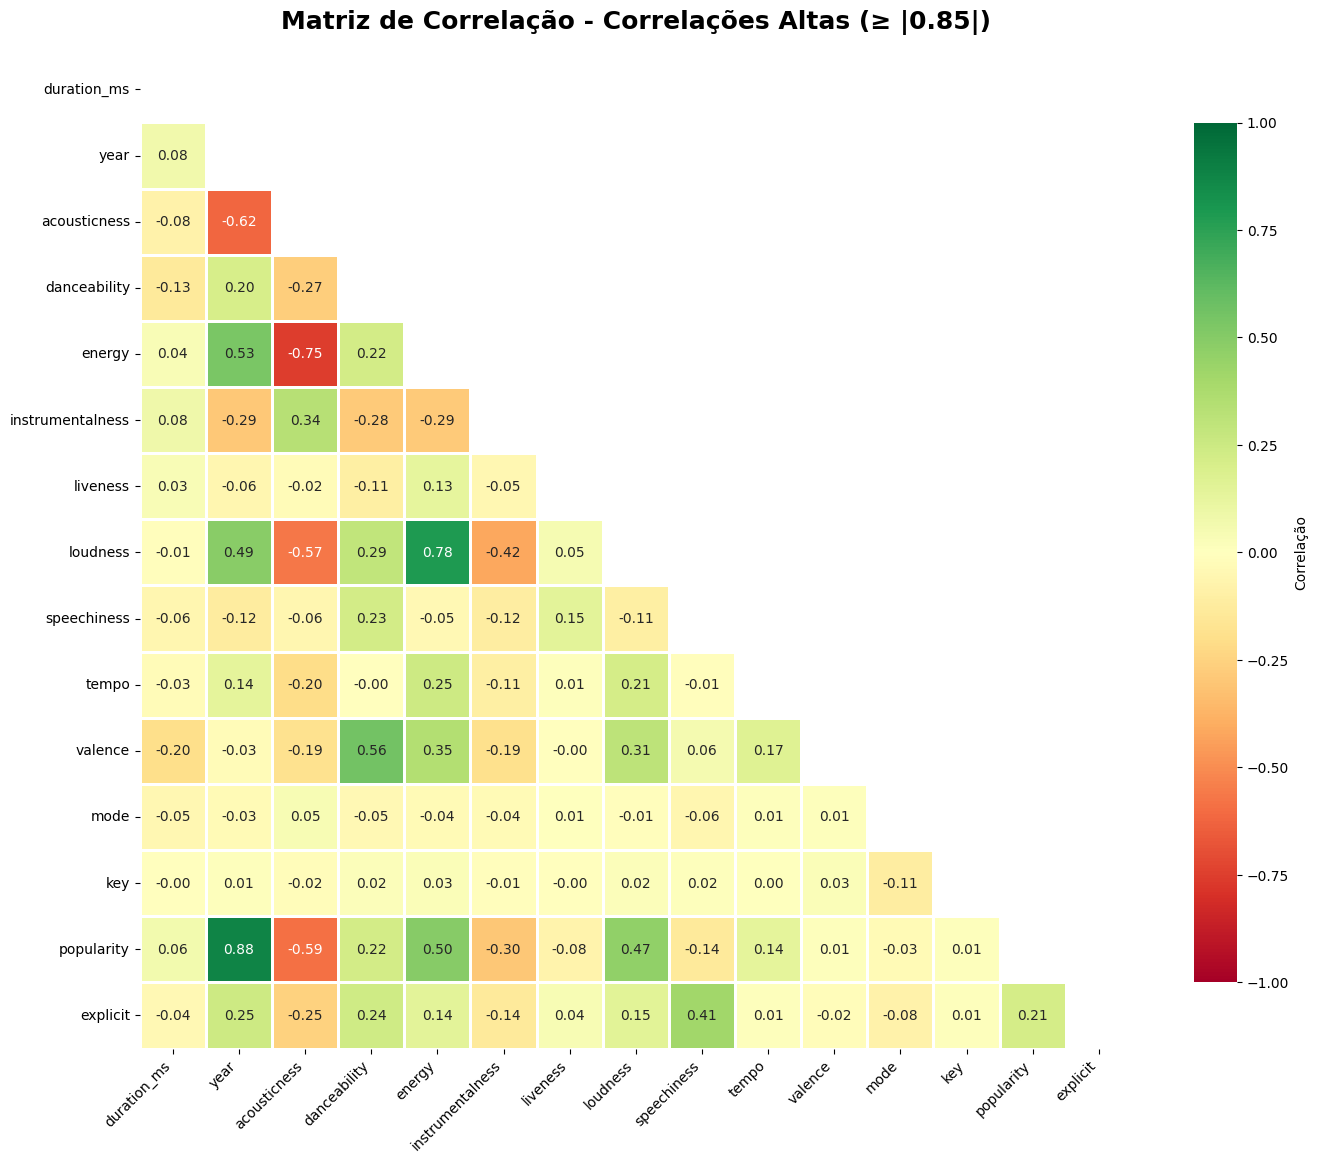

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Criar máscara para mostrar apenas a matriz triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

# Criar uma cópia da matriz e setar valores fora do threshold como NaN
filtered_matrix = correlation_matrix.copy()

# Visualizar apenas a matriz triangular inferior com tema verde
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', square=True, linewidths=1, linecolor='white',
            cbar_kws={"shrink": 0.8, "label": "Correlação"},
            annot_kws={"size": 10}, vmin=-1, vmax=1, mask=mask)
plt.title('Matriz de Correlação - Correlações Altas (≥ |0.85|)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Análise Descritiva das Features

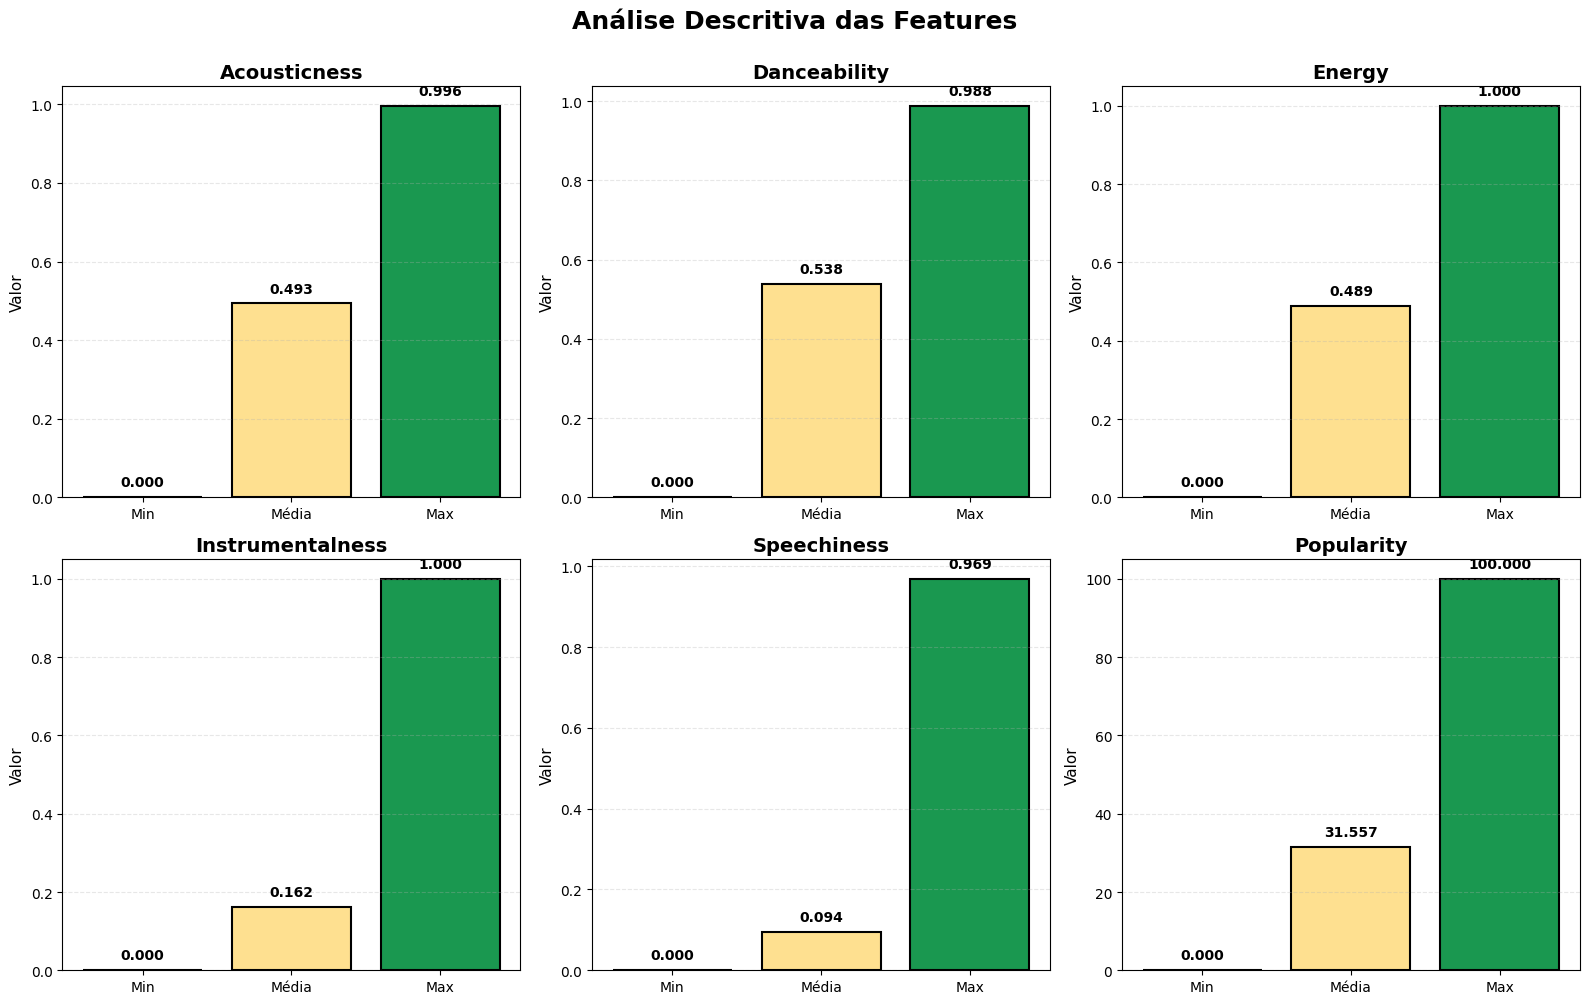

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Features para análise
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'speechiness', 'popularity']

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Análise Descritiva das Features', fontsize=18, fontweight='bold', y=1.00)

axes = axes.flatten()

# Para cada feature, calcular min, max e média
for idx, feature in enumerate(features):
    min_val = df[feature].min()
    max_val = df[feature].max()
    mean_val = df[feature].mean()
    
    # Criar dados para visualização
    stats = [min_val, mean_val, max_val]
    labels = ['Min', 'Média', 'Max']
    colors = ['#d73027', '#fee090', '#1a9850']
    
    # Plot de barras
    axes[idx].bar(labels, stats, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_title(feature.capitalize(), fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, (label, stat) in enumerate(zip(labels, stats)):
        axes[idx].text(i, stat + (max_val - min_val) * 0.02, f'{stat:.3f}', 
                      ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

**1. Distribuição Desbalanceada de Features**

Acousticness, Danceability, Energy, Instrumentalness e Speechiness variam de 0 a ~1.0, sugerindo dados normalizados
Popularity tem escala diferente (0-100), indicando que precisa de normalização antes de usar em modelos

**2. Features com Baixa Variabilidade**

Instrumentalness e Speechiness têm médias muito baixas (0.162 e 0.094), concentrando a maioria das músicas com pouco conteúdo instrumental ou de fala
Isso pode resultar em baixo poder preditivo se usadas diretamente

**3. Features com Distribuição Mais Uniforme**

Acousticness, Danceability e Energy têm médias moderadas (~0.49), sugerindo distribuição mais equilibrada
Estas são boas candidates para recomendação

**4. Popularity é Muito Variável**

Varia de 0 a 100, com média em ~31.5
Muitas músicas têm baixa popularidade, o que pode criar viés para músicas populares se não tratado

## Distribuição

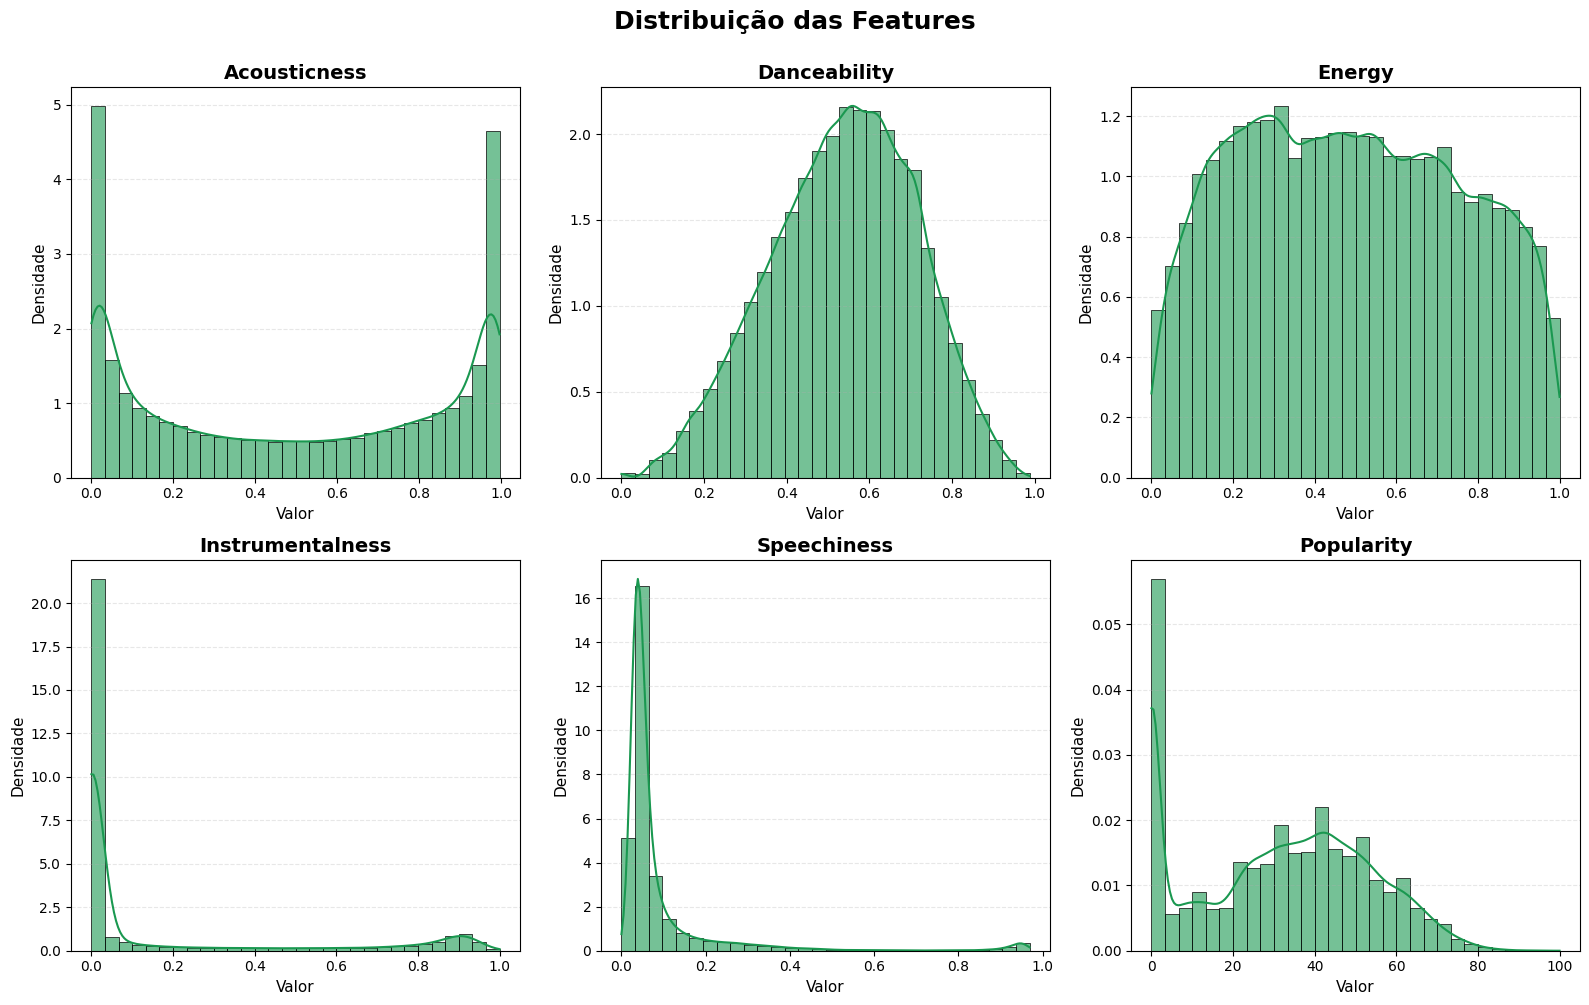

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features para análise
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'speechiness', 'popularity']

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição das Features', fontsize=18, fontweight='bold', y=1.00)

axes = axes.flatten()

# Para cada feature, criar histograma com KDE
for idx, feature in enumerate(features):
    # Histograma com KDE (curva de sino)
    sns.histplot(data=df, x=feature, kde=True, stat='density', 
                 bins=30, color='#1a9850', edgecolor='black', 
                 linewidth=0.5, ax=axes[idx], alpha=0.6)
    
    axes[idx].set_title(feature.capitalize(), fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=11)
    axes[idx].set_ylabel('Densidade', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

#### 📊 Insights sobre as Distribuições das Features

**1. Acousticness (Bimodal)**
- **Distribuição em forma de U**: Concentrada nos extremos (muito acústico ou nada acústico)
- **Insight**: Músicas tendem a ser ou **100% acústicas** ou **eletrônicas/produzidas**
- **Implicação para modelo**: Boa separação entre dois tipos de música, útil para recomendação

**2. Danceability (Normal/Gaussiana)**
- **Distribuição mais simétrica e centrada** em torno de 0.55
- **Insight**: Maioria das músicas tem **danceability moderada**
- **Implicação**: Feature bem distribuída, excelente para o modelo

**3. Energy (Ligeiramente Esquerda)**
- **Distribuição quase normal**, ligeiramente concentrada em valores menores
- **Insight**: Mais músicas com **baixa energia** do que alta energia
- **Implicação**: Potencial viés para músicas menos energéticas

**4. Instrumentalness (Altamente Assimétrica à Esquerda)**
- **~95% das músicas têm instrumentalness ≈ 0** (têm vocais)
- **Apenas ~5% são instrumentais**
- **Insight**: Dataset muito desbalanceado, quase nenhuma música puramente instrumental
- **⚠️ Problema**: Baixíssimo poder preditivo, pode prejudicar o modelo

**5. Speechiness (Altamente Assimétrica à Esquerda)**
- **~98% das músicas têm speechiness ≈ 0** (pouca fala)
- **Apenas ~2% são discursos/podcasts**
- **Insight**: Feature quase constante no dataset
- **⚠️ Problema**: Praticamente sem variância, **pode ser descartada**

**6. Popularity (Bimodal/Skewed)**
- **Pico muito alto em 0-10** (muitas músicas pouco populares)
- **Cauda longa até 100** (poucas músicas muito populares)
- **Insight**: Distribuição **altamente enviesada** para baixa popularidade
- **⚠️ Problema**: Risco de viés, modelo pode priorizar músicas populares